In [5]:
!pip install nltk 
!pip install natasha
!pip install sqlite3
!pip install pymorphy2
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
import re
import nltk
import sqlite3
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, Doc
from pymorphy2 import MorphAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/22/a5/a0b255295406ed54269814bc93723cfd1a0da63fb9aaf99e1364f07923e5/pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 330.3 kB/s eta 0:00:35
   ---------------------------------------- 0.0/11.5 MB 330.3 kB/s eta 0:00:35
   ---------------------------------------- 0.0/11.5 MB 196.9 kB/s eta 0:00:59
 

In [7]:
!pip install setuptools

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/de/88/70c5767a0e43eb4451c2200f07d042a4bcd7639276003a9c54a68cfcc1f8/setuptools-70.0.0-py3-none-any.whl.metadata
  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
conn = sqlite3.connect('articles.db')
cursor = conn.cursor()
cursor.execute("SELECT body FROM articles")
texts = cursor.fetchall()
conn.close()
texts = [text[0] for text in texts]
# Загружаем стоп-слова
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
stop_symb = set(['.', ' '])

# Инициализация инструментов для нормализации текста
segmenter = Segmenter()
morph_vocab = MorphVocab()
morph_analyzer = MorphAnalyzer()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
def normalize_text(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    
    normalized_tokens = []
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        if token.lemma not in stop_words and token.lemma not in stop_symb:
            normalized_tokens.append(token.lemma)
    return ' '.join(normalized_tokens)

normalized_texts = [normalize_text(text) for text in texts]
print(normalized_texts)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\green\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['фото : oleksandr ratushniak / reuters германия достигнуть предел вопрос оказание помощь украина заявление сделать канцлер фрг олафа шольц , передавать ntv « действительно довести весь возможный предел наш ответственность таков : поддерживать украина оборонительный борьба , позволить конфликт перерасти война россия нато » , — образ канцлер прокомментировать невозможность передача киев ракета taurus слово , передача дальнобойный ракета обязывать германия контролировать цель удар , сделать берлин сторона конфликт 24 май шольц объяснить отказ передача вооружить сила украина ракета taurus , киев смочь программировать вооружение , свой военный берлин отправить территория республика , опасаться риск эскалация', 'вячеслав володин фото : russian state duma / globallookpress com председатель госдума вячеслав володин рассказать , европейский политика травля ненависть стать обыденность это написать telegram « европейский политика отравить атмосфера ненависть , пронизать культ насилие отношение ,

In [9]:
# Векторизация текста
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(normalized_texts)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
# Сжатие векторов до 2 компонентов
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

In [11]:
# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(X_pca)

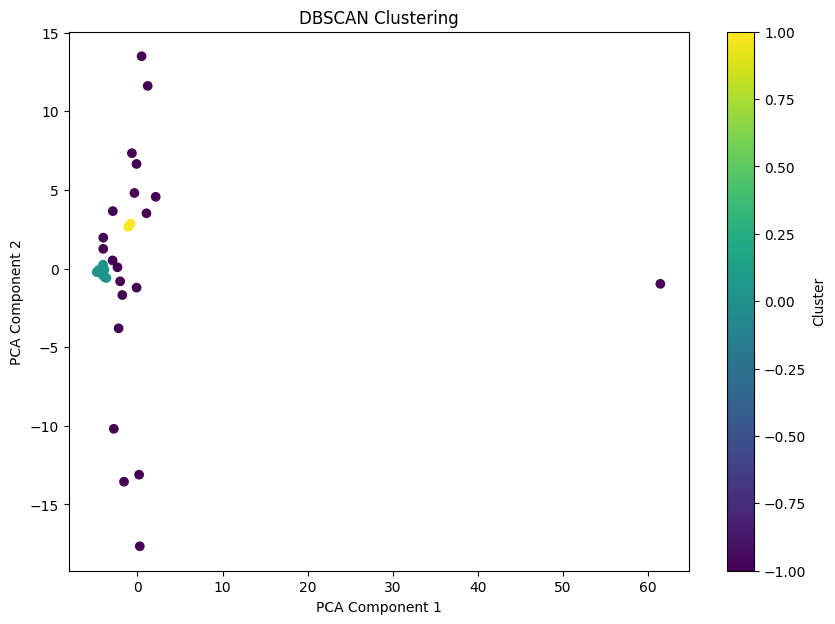

Cluster 0:
['Фото: Дмитрий Азаров / Коммерсантъ\nВертолет премьера Армении Никола Пашиняна совершил экстренную посадку в Ванадзоре. Об этом сообщает «Интерфакс».\nПо данным агентства, воздушному судну пришлось садиться на территории городского стадиона. Позднее сам политик сообщил, что с ним все в порядке, а посадка была совершена из-за погодных условий.\nИзвестно, что Пашинян намеревался посетить город Ташир, который находится близ границы Армении и Грузии.\nРанее сообщалось, что Пашинян не приехал в Туркмению на встречу премьер-министров СНГ. Вместо Пашиняна на встрече присутствовал чрезвычайный и полномочный посол Армении в Белоруссии Размик Хумарян.', 'Гуннар Бек. Фото: Sebastian Willnow / dpa / Globallookpress.com\nЧлен Европарламента от партии «Альтернатива для Германии» (АдГ) Гуннар Бек усомнился, что прошедшая недавно ксенофобская вечеринка в ФРГ была связана с политикой. Об этом он рассказал РЕН ТВ.\n«Я сомневаюсь, что речь о политике. Но в то же время это неприемлемое поведен

In [12]:
# Визуализация результатов
df = pd.DataFrame({'x': X_pca[:, 0], 'y': X_pca[:, 1], 'cluster': clusters})

plt.figure(figsize=(10, 7))
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Выделение тем по кластерам
for cluster in set(clusters):
    print(f"Cluster {cluster}:")
    cluster_texts = [texts[i] for i in range(len(clusters)) if clusters[i] == cluster]
    print(cluster_texts)